<!-- Implement the Continuous Bag of Words (CBOW) Model. Stages can be: -->

# Import Libraries 

In [2]:
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
data = "Artificial intelligence is a rapidly evolving field that focuses on creating machines capable of performing tasks that typically require human intelligence. These tasks include learning from experience, understanding natural language, and making decisions. Machine learning, a subset of AI, uses algorithms and statistical models to allow computers to improve from experience. Common applications of AI include autonomous vehicles, virtual assistants, medical diagnostics, and financial modeling. Natural language processing, a branch of AI, helps computers understand and interpret human language, enabling chatbots, translation systems, and voice assistants. AI continues to shape various industries by improving efficiency and enabling innovative solutions."
data

'Artificial intelligence is a rapidly evolving field that focuses on creating machines capable of performing tasks that typically require human intelligence. These tasks include learning from experience, understanding natural language, and making decisions. Machine learning, a subset of AI, uses algorithms and statistical models to allow computers to improve from experience. Common applications of AI include autonomous vehicles, virtual assistants, medical diagnostics, and financial modeling. Natural language processing, a branch of AI, helps computers understand and interpret human language, enabling chatbots, translation systems, and voice assistants. AI continues to shape various industries by improving efficiency and enabling innovative solutions.'

# Split into sentences


In [4]:
sentences = data.split('.')
sentences = [sentence for sentence in sentences if sentence.strip()]

# Clean Data of Special Characters


In [5]:
clean_sent = []
for sentence in sentences:
    sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence)
    sentence = re.sub(r'(?:^| )\\w (?:$| )', ' ', sentence).strip()
    sentence = sentence.lower()
    clean_sent.append(sentence)

# Tokenization


In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)

# Create dictionaries for word lookup


In [7]:
index_to_word = {}
word_to_index = {}

In [8]:
for i, sequence in enumerate(sequences):
    word_in_sentence = clean_sent[i].split()
    for j, value in enumerate(sequence):
        index_to_word[value] = word_in_sentence[j]
        word_to_index[word_in_sentence[j]] = value

# Create dictionaries to map between word and integer IDs


In [9]:
vocab_size = len(tokenizer.word_index) + 1
emb_size = 100 
context_size = 2

# Create contexts and targets for CBOW model


In [10]:
contexts = []
targets = []

for sequence in sequences:
    for i in range(1, len(sequence) - 1):
        if i - context_size >= 0 and i + context_size < len(sequence):
            target = sequence[i]
            context = [sequence[i - context_size], sequence[i + context_size]]
            contexts.append(context)
            targets.append(target)

# Convert contexts and targets to NumPy arrays


In [11]:
X = np.array(contexts)
Y = np.array(targets)

# Define the CBOW model architecture


In [12]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=emb_size),  # Removed input_length
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(256, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

# Compile the model


In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train the model


In [14]:
history = model.fit(X, Y, epochs=100, batch_size=32)


Epoch 1/100

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0106 - loss: 4.2639   
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2622 - loss: 4.2436 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3202 - loss: 4.2281 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3190 - loss: 4.2117 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3781 - loss: 4.1924 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3624 - loss: 4.1720 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3397 - loss: 4.1482 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3084 - loss: 4.1288 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3146 - loss: 4.0962 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3330 - loss: 4.0650 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2666 - loss: 4.0403 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3174 - 

 # Visualize training loss

In [15]:
embeddings = model.get_weights()[0]

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

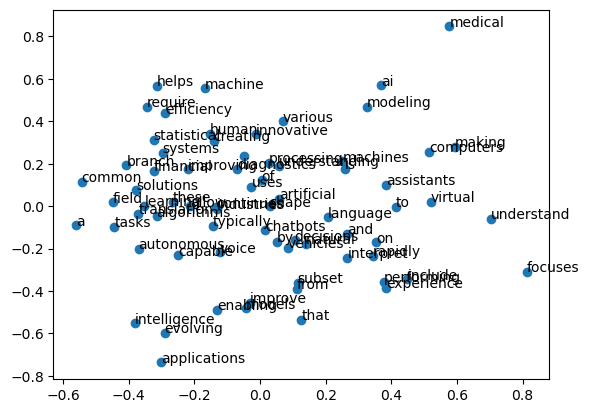

In [17]:
import matplotlib.pyplot as plt
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
for i, word in enumerate(index_to_word.values()):
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
plt.show()

In [19]:
test_sentences = [
    "machines capable of performing tasks",
    "subset of AI uses algorithms",
    "autonomous vehicles medical diagnostics",
    "chatbots translation systems voice assistants",
    "improving efficiency enabling innovative solutions"
]

for sent in test_sentences:
    test_words = sent.split(" ")
    x_test = []
    for i in test_words:
        # Add a default index for unknown words (e.g., 0 for unknown)
        word_index = word_to_index.get(i, 0)
        x_test.append(word_index)
    
    # Convert the list to a NumPy array
    x_test = np.array([x_test])

    # Predict and display the result
    pred = model.predict(x_test)
    pred = np.argmax(pred[0])
    print("pred ", test_words, "\n=", index_to_word.get(pred), "\n\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
pred  ['machines', 'capable', 'of', 'performing', 'tasks'] 
= a 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
pred  ['subset', 'of', 'AI', 'uses', 'algorithms'] 
= ai 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
pred  ['autonomous', 'vehicles', 'medical', 'diagnostics'] 
= assistants 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
pred  ['chatbots', 'translation', 'systems', 'voice', 'assistants'] 
= and 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
pred  ['improving', 'efficiency', 'enabling', 'innovative', 'solutions'] 
= and 


